In [ ]:
### Replicated by Jake Fredrich
### Iris Dataset taken from https://www.analyticsvidhya.com/blog/2018/05/24-ultimate-data-science-projects-to-boost-your-knowledge-and-skills/
### Portions of code and concepts taken from www.kaggle.com

In [1]:
# Install a pip package in the current Jupyter kernel if it doesn't exist
# import sys
# !{sys.executable} -m pip install ipywidgets



In [9]:
### Imports
import warnings
import time
import numpy as np # Used for dataframe manipulation & linear algebra
import pandas as pd # Used for creating and modifying dataframes
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Set Up Data
## Import the data file, load into a dataframe, and divide based on identifier to be used

In [12]:
ELEMENT_NAMES = ['SEPAL_L','SEPAL_W','PETAL_L','PETAL_W'] #Elements to be used
HEADER_NAMES = ELEMENT_NAMES 
HEADER_NAMES.append('TYPE') #Add Identifier to Header Names

File_Name = "iris.data"
df = pd.read_csv(File_Name) # Read File

df.columns = HEADER_NAMES # Rename Column Headers
IRIS_NAMES = df.TYPE.unique() # List of all Iris Classes
df.info()# Check to see if data is consistent and has null values
# print(df.head(2))

iris_df = df
    
#print(iris_dfs[2].head()) # Confirm split
iris_df.head()

#print(df.iloc[1,0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
SEPAL_L    149 non-null float64
SEPAL_W    149 non-null float64
PETAL_L    149 non-null float64
PETAL_W    149 non-null float64
TYPE       149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,SEPAL_L,SEPAL_W,PETAL_L,PETAL_W,TYPE
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


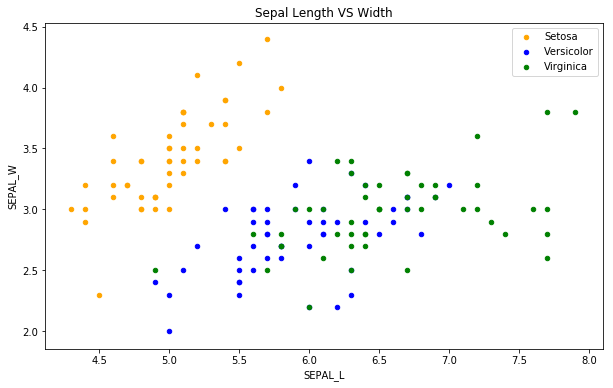

In [13]:
''' Create Chart Showing Relationship between Sepal Width and Length'''
fig = iris_df[iris_df.TYPE=='Iris-setosa'].plot(kind='scatter', \
        x='SEPAL_L',y='SEPAL_W', color='orange', label='Setosa')
iris_df[iris_df.TYPE=='Iris-versicolor'].plot(kind='scatter',\
        x='SEPAL_L',y='SEPAL_W', color='blue', label='Versicolor', ax =fig)
iris_df[iris_df.TYPE=='Iris-virginica'].plot(kind='scatter',\
        x='SEPAL_L',y='SEPAL_W', color='green', label='Virginica', ax =fig)
fig.set_xlabel('SEPAL_L')
fig.set_ylabel('SEPAL_W')
fig.set_title('Sepal Length VS Width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()



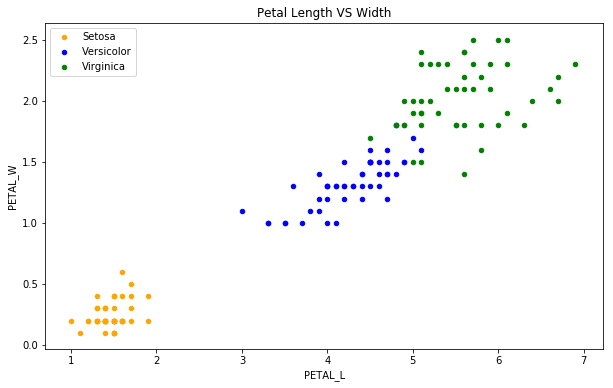

In [14]:
''' Create Chart Showing Relationship between Petal Width and Length'''

fig = iris_df[iris_df.TYPE=='Iris-setosa'].plot(kind='scatter', \
        x='PETAL_L',y='PETAL_W', color='orange', label='Setosa')
iris_df[iris_df.TYPE=='Iris-versicolor'].plot(kind='scatter',\
        x='PETAL_L',y='PETAL_W', color='blue', label='Versicolor', ax =fig)
iris_df[iris_df.TYPE=='Iris-virginica'].plot(kind='scatter',\
        x='PETAL_L',y='PETAL_W', color='green', label='Virginica', ax =fig)
fig.set_xlabel('PETAL_L')
fig.set_ylabel('PETAL_W')
fig.set_title('Petal Length VS Width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


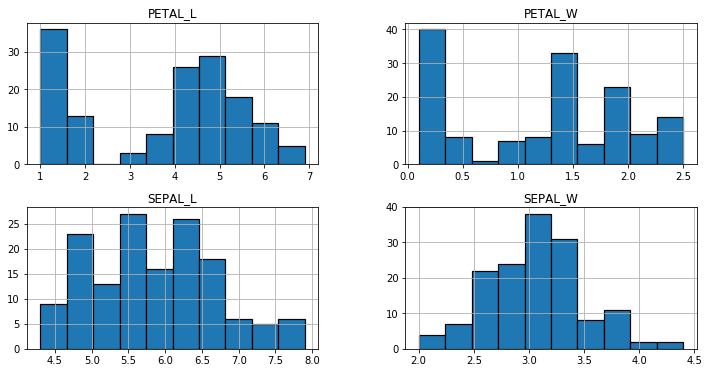

In [100]:
''' Create 4 Histograms showing the frequency distributions of PETAL and SEPAL Length and Width'''

iris_df.hist(edgecolor='black',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

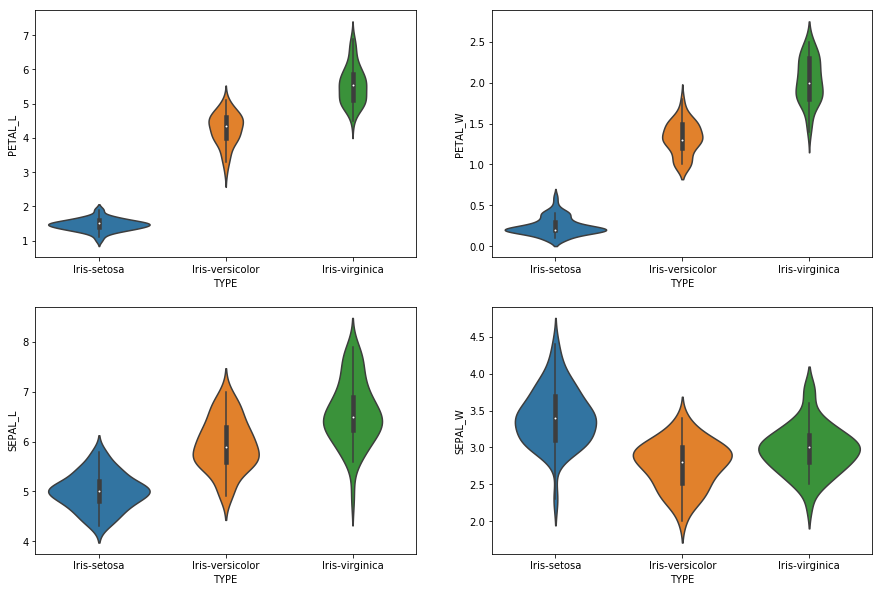

In [16]:
''' Create Violin Plots to show probability density for each Characteristic and Type '''

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='TYPE',y='PETAL_L', data=iris_df)
plt.subplot(2,2,2)
sns.violinplot(x='TYPE', y='PETAL_W', data=iris_df)
plt.subplot(2,2,3)
sns.violinplot(x='TYPE', y='SEPAL_L', data=iris_df)
plt.subplot(2,2,4)
sns.violinplot(x='TYPE', y='SEPAL_W', data=iris_df)

In [22]:
''' Import all the necessary packages to use the various classification algorithms '''
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbors
from sklearn import svm #for support Vector Machine (SVM) Algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algorithm


In [23]:
iris_main.shape # get the shape of the dataset

(149, 5)

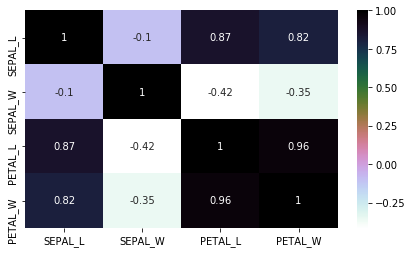

In [24]:
''' Create basic Heatmap to show correlation between differing qualities '''

plt.figure(figsize=(7,4))
sns.heatmap(iris_main.corr(),annot=True,cmap='cubehelix_r') #draws heatmap with input as correlation matrix calculated by (iris_main.corr())
plt.show()

In [25]:
'''Splitting the Data into Training and Testing Data'''

train, test = train_test_split(iris_df, test_size = 0.3)# Main data is split into train and test
print(train.shape)
print(test.shape)

(104, 5)
(45, 5)


In [26]:
''' Separating the Target Variable for train and test data '''

train_X = train[['SEPAL_L', 'SEPAL_W', 'PETAL_L', 'PETAL_W']] # Taking the training data features
train_y = train.TYPE # output of our training data
test_X = test[['SEPAL_L', 'SEPAL_W', 'PETAL_L', 'PETAL_W']]  # Taking test data features
test_y = test.TYPE # output value of test data


In [27]:
train_X.head(2)

,SEPAL_L,SEPAL_W,PETAL_L,PETAL_W
65,5.6,3.0,4.5,1.5
135,6.3,3.4,5.6,2.4


In [108]:
test_X.head(2)

,SEPAL_L,SEPAL_W,PETAL_L,PETAL_W
19,5.4,3.4,1.7,0.2
60,5.9,3.0,4.2,1.5


In [109]:
train_Y.head(2) ## Output of the training data

103     Iris-virginica
72     Iris-versicolor
Name: CLASS, dtype: object

In [110]:
test_Y.head(2)

15        Iris-setosa
83    Iris-versicolor
Name: CLASS, dtype: object

In [29]:
'''SUPPORT VECTOR MACHINE(SVM)'''

model = svm.SVC() #select SVM algorithm
model.fit(train_X,train_y) # Train the algorithm with the training data and the training output
prediction=model.predict(test_X) #Pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 1.0


C:\Users\JAKEFREDRICH\Anaconda3\envs\BaseClone\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
'''LOGISTIC REGRESSION'''
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 1.0


C:\Users\JAKEFREDRICH\Anaconda3\envs\BaseClone\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAKEFREDRICH\Anaconda3\envs\BaseClone\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
'''Decision Tree'''
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9333333333333333


In [32]:
''' K Nearest Neighbor '''

model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9777777777777777


([<matplotlib.axis.XTick at 0x21de9f5a0f0>,
 <a list of 10 Text xticklabel objects>)

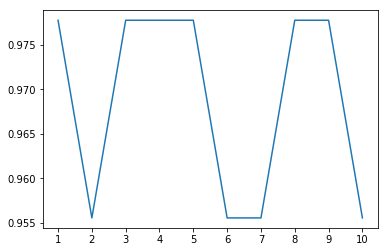

In [33]:
''' Create chart showing the accuracy of K Nearest Neighbor at different classified n_neighbors'''

a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

In [34]:

'''Now use Petals and Sepals separately'''

petal = iris_main[['PETAL_L', 'PETAL_W', 'CLASS']]
sepal = iris_main[['SEPAL_L', 'SEPAL_W', 'CLASS']]
petal.head()


,PETAL_L,PETAL_W,CLASS
0,1.4,0.2,Iris-setosa
1,1.3,0.2,Iris-setosa
2,1.5,0.2,Iris-setosa
3,1.4,0.2,Iris-setosa
4,1.7,0.4,Iris-setosa


In [35]:
train_p, test_p = train_test_split(petal, test_size =0.3, random_state=0) # petals
train_x_p = train_p[['PETAL_W', 'PETAL_L']]
train_y_p = train_p.CLASS
test_x_p = test_p[['PETAL_W', 'PETAL_L']]
test_y_p = test_p.CLASS

train_s, test_s = train_test_split(sepal, test_size=.3, random_state = 0) # SEPAL
train_x_s = train_s[['SEPAL_W', 'SEPAL_L']]
train_y_s = train_s.CLASS
test_x_s = test_s[['SEPAL_W', 'SEPAL_L']]
test_y_s = test_s.CLASS


print(train_x_p.shape)
print(train_y_p.shape)
print(test_x_p.shape)
print(test_y_p.shape)

(104, 2)
(104,)
(45, 2)
(45,)


In [36]:
'''SVM For Petal and Sepal'''

model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))



The accuracy of the SVM using Petals is: 0.9111111111111111
The accuracy of the SVM using Sepal is: 0.7555555555555555


C:\Users\JAKEFREDRICH\Anaconda3\envs\BaseClone\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JAKEFREDRICH\Anaconda3\envs\BaseClone\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
'''Logistic Regression for Petal and Sepal'''

model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.8888888888888888
The accuracy of the Logistic Regression using Sepals is: 0.6666666666666666


C:\Users\JAKEFREDRICH\Anaconda3\envs\BaseClone\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAKEFREDRICH\Anaconda3\envs\BaseClone\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JAKEFREDRICH\Anaconda3\envs\BaseClone\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAKEFREDRICH\Anaconda3\envs\BaseClone\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [38]:
'''Decision Tree for Petal and Sepal'''
model = DecisionTreeClassifier()
model.fit(train_x_p, train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the Decision Tree using Petals is:', metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s, train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the Decision Tree using Sepals is:', metrics.accuracy_score(prediction,test_y_s)
)


The accuracy of the Decision Tree using Petals is: 0.9111111111111111
The accuracy of the Decision Tree using Sepals is: 0.7555555555555555


In [39]:
'''KNeighbors with Petal and Sepal'''

model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9111111111111111
The accuracy of the KNN using Sepals is: 0.7111111111111111


([<matplotlib.axis.XTick at 0x21de9fcc4e0>,
 <a list of 10 Text xticklabel objects>)

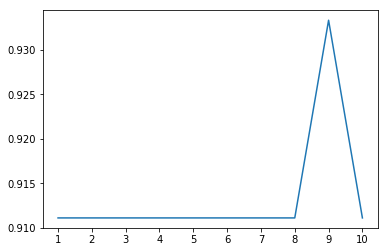

In [40]:
'''Print Chart showing accuracy'''
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_x_p,train_y_p)
    prediction=model.predict(test_x_p)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y_p)))
plt.plot(a_index, a)
plt.xticks(x)